# **Flight Price Prediction Model**

* **Name:** Faiza Abbasi
* **Email:** faizaabbasi988@gmail.com

## Instructions:
1. You'll have a dataset
2. Find the cheapest and expensive flight at a specific time
3. You have to go through EDA
4. ML Model
5. Find a sweet spot for cheap ticket

## Problem Definition

* Ahmed is a customer of **Sastaticket.pk**. He is planning to fly from Karachi to Islamabad for his<br>
brother’s wedding and is currently in the process of choosing tickets.<br>
* Ahmed has to go to Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait instead of buy now,<br>
simply because ticket prices are just too high.<br>
* Is this the right decision? Won’t ticket prices increase in the future?<br>
* Perhaps there is a sweet-spot Ahmed is hoping to find and maybe he just might find it.<br>
* This is the problem that you will be tackling in this competition.<br>
**Can you predict future prices accurately to such a degree that you can now tell Ahmed - with confidence - that he has made the wrong decision.**

## **Exploratory Data Analysis**

### Import Libraries and Dataset

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"sastaticket_train.csv")
SastaX_test = pd.read_csv(r"sastaticket_test.csv")

### Check the Dimensions/Shape of the Dataset

In [3]:
print(df.shape, SastaX_test.shape)

(5000, 14) (250, 11)


Dataframe includes the following features:
- **f1:** Ticket Purchase Date Time
- **f2:** Origin
- **f3:** Destination
- **f4:** Departure Date Time
- **f5:** Arrival Date Time
- **f6:** Airline
- **f7:** Refundable Ticket
- **f8:** Baggage Weight
- **f9:** Baggage Pieces
- **f10:** Flight Number
- **target:** Prices

In [4]:
df.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [57]:
SastaX_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


### **Assignment 1:** What does concat on axis=0 and axis=1 do?
**Ans:** axis=0 allows one dataset to be added to the rows of the other dataset
whereas axis=1 allows one dataset to be added to the columns (can cause duplication if same column names)

### Getting Info of all the columns/labels

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  5000 non-null   int64  
 1   Unnamed: 0    5000 non-null   int64  
 2   f1            5000 non-null   object 
 3   f2            5000 non-null   object 
 4   f3            5000 non-null   object 
 5   f4            5000 non-null   object 
 6   f5            5000 non-null   object 
 7   f6            5000 non-null   object 
 8   f7            5000 non-null   bool   
 9   f8            5000 non-null   float64
 10  f9            5000 non-null   int64  
 11  f10           5000 non-null   object 
 12  Unnamed: 0.1  5000 non-null   int64  
 13  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 512.8+ KB


### Checking for missing values

In [11]:
# check null values
df.isnull().sum()

Unnamed: 0.2    0
Unnamed: 0      0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.1    0
target          0
dtype: int64

### Basic Statistics about Dataset

In [12]:
# summary statistics
df.describe()

,Unnamed: 0.2,Unnamed: 0,f8,f9,Unnamed: 0.1,target
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.086293e+07,1.086293e+07,22.494400,0.944600,1.086293e+07,10104.351800
std,6.275456e+06,6.275456e+06,8.887101,0.607951,6.275456e+06,3359.936118
min,2.499000e+03,2.499000e+03,0.000000,0.000000,2.499000e+03,4990.000000
25%,5.417290e+06,5.417290e+06,20.000000,1.000000,5.417290e+06,7796.000000
50%,1.093803e+07,1.093803e+07,20.000000,1.000000,1.093803e+07,9403.000000
75%,1.621582e+07,1.621582e+07,32.000000,1.000000,1.621582e+07,11245.000000
max,2.177443e+07,2.177443e+07,45.000000,2.000000,2.177443e+07,33720.000000


## **Feature Engineering**

### Finding unique values in categorical columns

In [5]:
# finding unique values in categorical list
cat_list = ['f2', 'f3', 'f6', 'f7', 'f8', 'f9', 'f10']
SastaX_cat_list = ['f2', 'f3', 'f6', 'f7', 'f8', 'f9', 'f10']

[print(x,df[x].unique(),"\n......") for x in cat_list]

f2 ['x'] 
......
f3 ['y'] 
......
f6 ['gamma' 'alpha' 'beta' 'omega'] 
......
f7 [ True False] 
......
f8 [ 0. 35. 20. 15. 32. 40. 45.] 
......
f9 [0 1 2] 
......
f10 ['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73'] 
......


[None, None, None, None, None, None, None]

### Removing columns that don't provide us any meaningful insights

In [6]:
# going to remove f2 and f3 since they don't provide us with anything
df = df.drop(columns=df.iloc[:,[0,1,3,4,12]], axis=1)
SastaX_test = SastaX_test.drop(columns=SastaX_test.iloc[:,[0,2,3]], axis=1)
df.head()

,f1,f4,f5,f6,f7,f8,f9,f10,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,6500.0


In [7]:
SastaX_test.head()

,f1,f4,f5,f6,f7,f8,f9,f10
0,2021-09-16 12:20:01.578279+00:00,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,2021-09-18 20:13:13.612131+00:00,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,2021-09-24 17:53:41.424953+00:00,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,2021-09-07 19:39:07.182848+00:00,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,2021-09-05 03:48:20.099555+00:00,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


### Taking another look of Info of our dataset after removing columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   f10     5000 non-null   object 
 8   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 317.5+ KB


### Typecasting (converting dates into Pandas DataTime Format)

In [8]:
# convert datetime to pandas datetime
from datetime import date, datetime

df["f1"] = pd.to_datetime(df["f1"])
df["f4"] = pd.to_datetime(df["f4"])
df["f5"] = pd.to_datetime(df["f5"])

SastaX_test["f1"] = pd.to_datetime(SastaX_test["f1"])
SastaX_test["f4"] = pd.to_datetime(SastaX_test["f4"])
SastaX_test["f5"] = pd.to_datetime(SastaX_test["f5"])

### Verifying the Typecasting

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   f10     5000 non-null   object             
 8   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(2)
memory usage: 317.5+ KB


In [9]:
SastaX_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      250 non-null    datetime64[ns, UTC]
 1   f4      250 non-null    datetime64[ns, UTC]
 2   f5      250 non-null    datetime64[ns, UTC]
 3   f6      250 non-null    object             
 4   f7      250 non-null    bool               
 5   f8      250 non-null    float64            
 6   f9      250 non-null    int64              
 7   f10     250 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](3), float64(1), int64(1), object(2)
memory usage: 14.0+ KB


### Inserting new columns in dataset by analyzing dataset

In [10]:
# adding column after substraction
df.insert(0,"time_to_dept(s)",((df["f4"]-df["f1"]).astype("timedelta64[s]")), True)
df.insert(1,"travel_time(s)",((df["f5"]-df["f4"]).astype("timedelta64[s]")), True)

SastaX_test.insert(0,"time_to_dept(s)",((SastaX_test["f4"]-SastaX_test["f1"]).astype("timedelta64[s]")), True)
SastaX_test.insert(1,"travel_time(s)",((SastaX_test["f5"]-SastaX_test["f4"]).astype("timedelta64[s]")), True)
df.head()

,time_to_dept(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,6500.0


In [74]:
SastaX_test.head()

,time_to_dept(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,f10
0,1441198.0,7200.0,2021-09-16 12:20:01.578279+00:00,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,420706.0,7200.0,2021-09-18 20:13:13.612131+00:00,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,4043178.0,7200.0,2021-09-24 17:53:41.424953+00:00,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,465652.0,6900.0,2021-09-07 19:39:07.182848+00:00,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,1469499.0,7200.0,2021-09-05 03:48:20.099555+00:00,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


### Verifying if missing values generated after new columns or not

In [19]:
df.isnull().sum()

time_to_dept(s)    0
travel_time(s)     0
f1                 0
f4                 0
f5                 0
f6                 0
f7                 0
f8                 0
f9                 0
f10                0
target             0
dtype: int64

### Separating categorical and continuous columns for plotting

In [11]:
cat_cols = ["f6", "f7", "f8", "f9"]
num_cols = ["time_to_dept(s)", "travel_time(s)"]

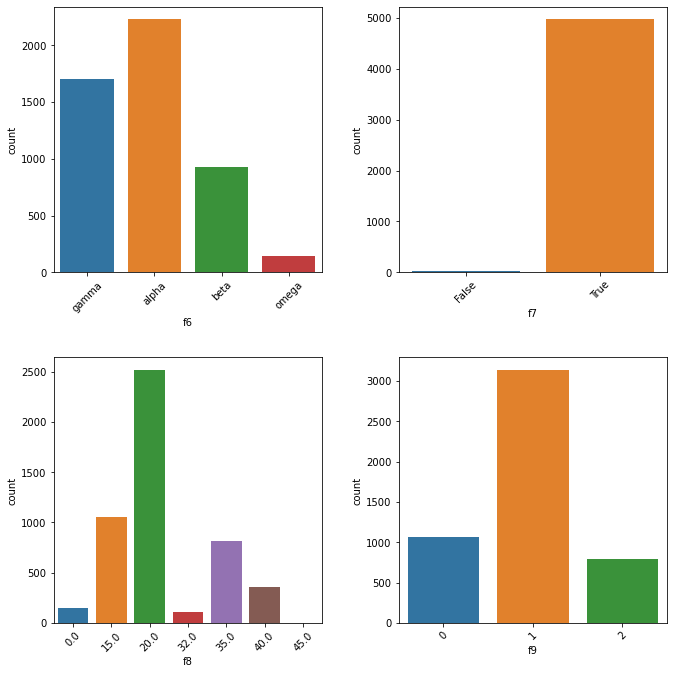

In [24]:
# plotting categorical data
c=1
plt.figure(figsize=(10,10))
for i in cat_cols:
    plt.subplot(2,2,c)
    sns.countplot(x=df[i])
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)
    c = c+1
plt.show()


<Figure size 720x576 with 0 Axes>

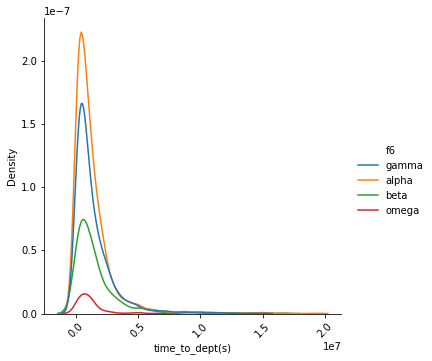

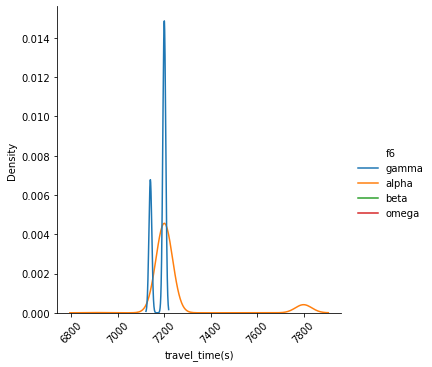

In [49]:
# plotting numerical data
c=1
plt.figure(figsize=(10,8))
for i in num_cols:
    sns.displot(df,
        x=df[i],
        hue="f6",
        kind="kde",
        warn_singular=False)
    plt.xticks(rotation=45)
plt.show()


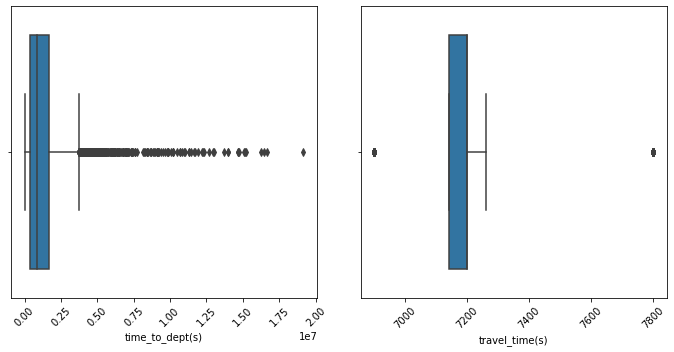

In [50]:
c=1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(2,2,c)
    sns.boxplot(x=df[i])
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)
    c = c+1
plt.show()

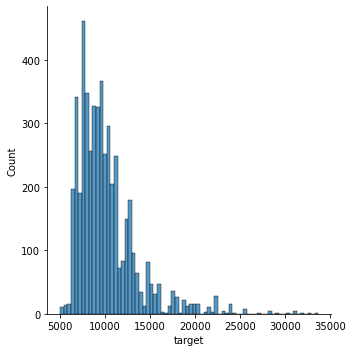

In [24]:
# target
sns.displot(df["target"])

<AxesSubplot:xlabel='target'>

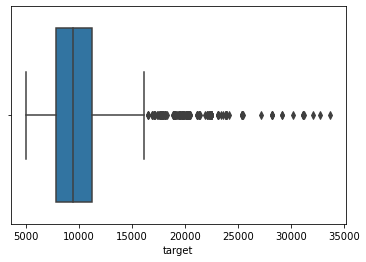

In [51]:
sns.boxplot(x=df["target"])

### Outlier removal from dataset depending on the data

In [52]:
# Assignment 2: Outlier Removal
df = df[df["target"]<15500]
df = df[df["time_to_dept(s)"] < 3100000]

<AxesSubplot:xlabel='target'>

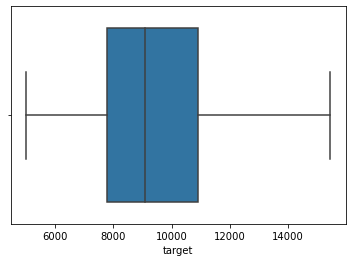

In [53]:
sns.boxplot(x=df["target"])

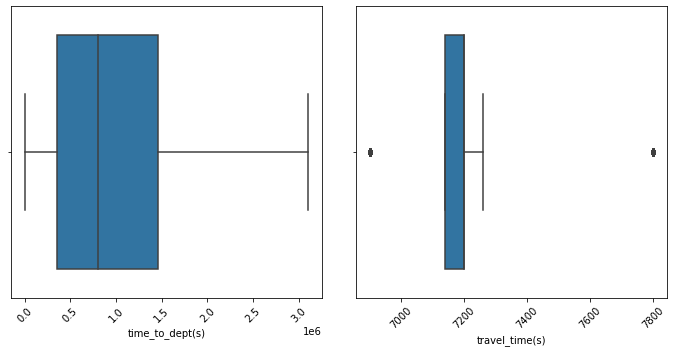

In [54]:
c=1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(2,2,c)
    sns.boxplot(x=df[i])
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)
    c = c+1
plt.show()

### Checking Skewness/ Horizontal shift of the data

In [55]:
df.skew()

C:\Users\Arsla\AppData\Local\Temp/ipykernel_7940/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


time_to_dept(s)     0.799818
travel_time(s)      1.399094
f7                -11.199555
f8                  0.408810
f9                  0.018366
target              0.629067
dtype: float64

### Checking Kurtosis/ Vertical shift of the data

In [56]:
df.kurtosis()

C:\Users\Arsla\AppData\Local\Temp/ipykernel_7940/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


time_to_dept(s)     -0.216391
travel_time(s)       5.418043
f7                 123.488350
f8                   0.152540
f9                  -0.200008
target              -0.265876
dtype: float64

### Dropping unwanted columns

### **Assignment 2:** Use the f10 in your dataset too. Don't drop it

In [57]:
df.drop(['f1','f4','f5'], axis=1, inplace=True)
SastaX_test.drop(['f1','f4','f5'], axis=1, inplace=True)
df.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10,target
0,1268192.0,7200.0,gamma,True,0.0,0,c-2,7400.0
1,29688.0,7200.0,alpha,True,35.0,1,a-9,15377.0
2,3033072.0,7200.0,gamma,True,20.0,1,c-4,6900.0
3,363011.0,7200.0,alpha,True,15.0,1,a-23,9707.0
4,2142368.0,6900.0,beta,True,20.0,0,b-1,6500.0


In [58]:
SastaX_test.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10
0,1441198.0,7200.0,omega,True,20.0,1,d-1
1,420706.0,7200.0,omega,True,20.0,1,d-5
2,4043178.0,7200.0,alpha,True,20.0,1,a-9
3,465652.0,6900.0,beta,True,40.0,0,b-1
4,1469499.0,7200.0,alpha,True,20.0,1,a-1


## **Feature Encoding** / Labelling / Dummies / Transformation

In [59]:
# encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["f6"] = le.fit_transform(df["f6"])
df["f7"] = le.fit_transform(df["f7"])
df["f8"] = le.fit_transform(df["f8"])
df["f10"] = le.fit_transform(df["f10"])

SastaX_test["f6"] = le.fit_transform(SastaX_test["f6"])
SastaX_test["f7"] = le.fit_transform(SastaX_test["f7"])
SastaX_test["f8"] = le.fit_transform(SastaX_test["f8"])
SastaX_test["f10"] = le.fit_transform(SastaX_test["f10"])

df.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10,target
0,1268192.0,7200.0,2,1,0,0,13,7400.0
1,29688.0,7200.0,0,1,4,1,4,15377.0
2,3033072.0,7200.0,2,1,2,1,14,6900.0
3,363011.0,7200.0,0,1,1,1,1,9707.0
4,2142368.0,6900.0,1,1,2,0,5,6500.0


In [60]:
SastaX_test.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10
0,1441198.0,7200.0,3,0,1,1,13
1,420706.0,7200.0,3,0,1,1,15
2,4043178.0,7200.0,0,0,1,1,4
3,465652.0,6900.0,1,0,2,0,5
4,1469499.0,7200.0,0,0,1,1,0


In [61]:
df.describe()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10,target
count,4.235000e+03,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000
mean,9.815312e+05,7165.175915,0.942621,0.992208,2.248170,0.941677,7.665880,9518.582763
std,7.588160e+05,173.352386,0.953954,0.087939,1.229093,0.595328,5.818833,2195.993686
min,2.003000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.542255e+05,7140.000000,0.000000,1.000000,1.000000,1.000000,2.000000,7765.000000
50%,8.063530e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,5.000000,9077.000000
75%,1.457227e+06,7200.000000,2.000000,1.000000,2.000000,1.000000,13.000000,10900.000000
max,3.099926e+06,7800.000000,3.000000,1.000000,6.000000,2.000000,18.000000,15455.000000


## **Feature Scaling** / Standardization / Transformation

### **Assignment 3:** Standardize the dataset
Ans: The results were not coming satisfactory by Standarization. Thus turned it off

In [79]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# df["time_to_dept(s)"] = sc.fit_transform(df[["time_to_dept(s)"]])
# df["travel_time(s)"] = sc.fit_transform(df[["time_to_dept(s)"]])
# # df["target"] = sc.fit_transform(df[["target"]])

# SastaX_test["time_to_dept(s)"] = sc.fit_transform(SastaX_test[["time_to_dept(s)"]])
# SastaX_test["travel_time(s)"] = sc.fit_transform(SastaX_test[["time_to_dept(s)"]])

In [62]:
df.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10,target
0,1268192.0,7200.0,2,1,0,0,13,7400.0
1,29688.0,7200.0,0,1,4,1,4,15377.0
2,3033072.0,7200.0,2,1,2,1,14,6900.0
3,363011.0,7200.0,0,1,1,1,1,9707.0
4,2142368.0,6900.0,1,1,2,0,5,6500.0


In [63]:
SastaX_test.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10
0,1441198.0,7200.0,3,0,1,1,13
1,420706.0,7200.0,3,0,1,1,15
2,4043178.0,7200.0,0,0,1,1,4
3,465652.0,6900.0,1,0,2,0,5
4,1469499.0,7200.0,0,0,1,1,0


### Splitting Data into Features (X) and Target (y)

In [64]:
# splitting our data into X and y
X = df.drop(columns=["target"], axis=1)
y = df["target"]

In [65]:
X.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10
0,1268192.0,7200.0,2,1,0,0,13
1,29688.0,7200.0,0,1,4,1,4
2,3033072.0,7200.0,2,1,2,1,14
3,363011.0,7200.0,0,1,1,1,1
4,2142368.0,6900.0,1,1,2,0,5


In [66]:
y.head()

0     7400.0
1    15377.0
2     6900.0
3     9707.0
4     6500.0
Name: target, dtype: float64

In [67]:
SastaX_test.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10
0,1441198.0,7200.0,3,0,1,1,13
1,420706.0,7200.0,3,0,1,1,15
2,4043178.0,7200.0,0,0,1,1,4
3,465652.0,6900.0,1,0,2,0,5
4,1469499.0,7200.0,0,0,1,1,0


### Overall correlation of all columns with one another

In [68]:
df.corr()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,f10,target
time_to_dept(s),1.000000,-0.023348,0.022422,0.006862,0.008762,-0.009435,0.029596,-0.085570
travel_time(s),-0.023348,1.000000,-0.197782,0.135577,-0.283465,0.394041,-0.253357,0.077330
f6,0.022422,-0.197782,1.000000,-0.005331,-0.033175,0.267753,0.954401,0.016553
f7,0.006862,0.135577,-0.005331,1.000000,-0.067325,0.140193,-0.007397,-0.020562
f8,0.008762,-0.283465,-0.033175,-0.067325,1.000000,-0.160649,0.002152,0.221335
f9,-0.009435,0.394041,0.267753,0.140193,-0.160649,1.000000,0.221685,0.175410
f10,0.029596,-0.253357,0.954401,-0.007397,0.002152,0.221685,1.000000,0.037290
target,-0.085570,0.077330,0.016553,-0.020562,0.221335,0.175410,0.037290,1.000000


### Corrleation of all features with target only

In [69]:
X.corrwith(y)

time_to_dept(s)   -0.085570
travel_time(s)     0.077330
f6                 0.016553
f7                -0.020562
f8                 0.221335
f9                 0.175410
f10                0.037290
dtype: float64

## **Model Selection**: Choosing regression models since target is continuous

In [70]:
# ML Modeling

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# rms = mean_absolute_error(y_test, y_pred, squared=False)

In [71]:
# shorten the names
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svr = SVR()
knn = KNeighborsRegressor()

### Splitting data into Train and Test and Model Traning and Evaluation

### **Assignment 4:** Why random_state=42?
**Ans:** Random_state is used to set the seed for the random generator so that we can ensure that<br>
the results that we get can be reproduced. Anyone with random_state=42 will get same results as me.

In [72]:
# model loop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in [lr, dt, rf, svr, knn]: # read all models
    i.fit(X_train, y_train)  # fitting a model
    y_pred = i.predict(X_test) # predict
    test_score = r2_score(y_test, y_pred)
    train_score = r2_score(y_train, i.predict(X_train))
    if abs(train_score - test_score) <= 5:
        print(i)
        # print("Train score:", train_score)
        # print("Test score:", test_score)
        print("R2 score:", test_score)
        print("MAE:", mean_absolute_error(y_test, y_pred))
        print("MSE:", mean_squared_error(y_test, y_pred))
        print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
        print("-"*30)

res = pd.DataFrame(y_pred)
res.index = X_test.index
res.columns = ["prediction"]
res.to_csv("test_pred.csv")

LinearRegression()
R2 score: 0.1324828155231702
MAE: 1691.7218418376394
MSE: 4431947.399587053
RMSE: 2105.219085887987
------------------------------
DecisionTreeRegressor()
R2 score: -0.5154487994797545
MAE: 2097.4864226682407
MSE: 7742082.216056671
RMSE: 2782.4597420370114
------------------------------
RandomForestRegressor()
R2 score: 0.021509308811706096
MAE: 1757.9542975206612
MSE: 4998885.73037013
RMSE: 2235.818805353003
------------------------------
SVR()
R2 score: -0.05791406172642999
MAE: 1833.034657371001
MSE: 5404641.612583819
RMSE: 2324.7885092162296
------------------------------
KNeighborsRegressor()
R2 score: -0.14000024141533007
MAE: 1964.837780401417
MSE: 5824001.179315229
RMSE: 2413.2967449767193
------------------------------


In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 1360 to 2986
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time_to_dept(s)  847 non-null    float64
 1   travel_time(s)   847 non-null    float64
 2   f6               847 non-null    int32  
 3   f7               847 non-null    int64  
 4   f8               847 non-null    int64  
 5   f9               847 non-null    int64  
 6   f10              847 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 46.3 KB


In [74]:
SastaX_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time_to_dept(s)  250 non-null    float64
 1   travel_time(s)   250 non-null    float64
 2   f6               250 non-null    int32  
 3   f7               250 non-null    int64  
 4   f8               250 non-null    int64  
 5   f9               250 non-null    int64  
 6   f10              250 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 11.8 KB


### Saving prediction results 

In [75]:
# to save prediction for SVR because its the only one that has highest R2 among others

svr = SVR().fit(X, y)
pred = svr.predict(SastaX_test)


res = pd.DataFrame(pred)
res.index = SastaX_test.index
res.columns = ["prediction"]
res.to_csv("sastaticket_pred.csv")

## Taking Values from User and Predicting them

### Model Training

In [119]:
# shortcut method to choose only insightful columns and convert datetime to Pandas Datetime
import pandas as pd
df2 = pd.read_csv(r"sastaticket_train.csv", parse_dates=["f1", "f4", "f5"], usecols=["f1", "f4", "f5", "f6", "f7", "f8", "f9", "f10", "target"])
# By default, date columns are represented as object when loading data from a CSV file. 
# To read the date column correctly, we can use the argument parse_dates to specify a list of date columns.

df2.insert(0,"time_to_depart", ((df2.f4 - df2.f1)),True)
df2.insert(1,"travel_time", ((df2.f5 - df2.f4)),True)

df2.drop(columns=["f1", "f4", "f5"], inplace=True)

from datetime import date, datetime
df2["time_to_depart"] = df2.time_to_depart.astype("timedelta64[s]")
df2["travel_time"] = df2.travel_time.astype("timedelta64[s]")

timestamp = pd.Timestamp(datetime(2021, 12, 30))
today = timestamp.today()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["f6"] = le.fit_transform(df2["f6"])
df2["f7"] = le.fit_transform(df2["f7"])
df2["f8"] = le.fit_transform(df2["f8"])
df2["f10"] = le.fit_transform(df2["f10"])

X = df2.drop(columns=["target","f6", "f7", "f10"], axis=1)
y = df2["target"]

from sklearn.svm import SVR
svr = SVR().fit(X, y)

### Model implementation

In [133]:
def user():
    date = pd.to_datetime(input("Enter date in YYYY-MM-DD "))
    travel_time = pd.to_datetime(input("Enter travel_time in HH:MM:SS "))
    weight = float(input("Enter bag weight KGs "))
    pieces = int(input("Enter number of bags "))

    date = (pd.DataFrame([date-today])).astype("timedelta64[s]")
    travel_time = (pd.DataFrame([travel_time-today])).astype("timedelta64[s]")
    return [date,travel_time, weight, pieces]

any_user = pd.DataFrame(user())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


### Model Prediction

In [132]:
svr.predict(any_user.transpose())

array([9310.62125098])